# Demo: Defining Control_M Workflows using Python

# Step 1 - Setup

## Step 1A - Install the library

In [1]:
!pip --version

pip 21.2.4 from /opt/conda/lib/python3.8/site-packages/pip (python 3.8)


In [2]:
!pip install git+https://github.com/tadinve/ctm_python_client.git

  Cloning https://github.com/tadinve/ctm_python_client.git to /tmp/pip-req-build-uu1eg0a2
  Running command git clone -q https://github.com/tadinve/ctm_python_client.git /tmp/pip-req-build-uu1eg0a2
  Resolved https://github.com/tadinve/ctm_python_client.git to commit 444e8074730477ee00da5027e8118f22df083971
  Created wheel for ctm-python-client: filename=ctm_python_client-0.3.0-py3-none-any.whl size=598731 sha256=b7cd87eb35b9f80fc864219f6c4d209ec1e2c2f0510a826b2cf80418691f49f1
  Stored in directory: /tmp/pip-ephem-wheel-cache-fcs4gkj6/wheels/30/51/3d/ed0afc33329fe5f00ec693887200c9dbff52ff29ff02843134
Successfully built ctm-python-client


In [3]:
import os
from ctm_python_client.core.bmc_control_m import CmJobFlow
from ctm_python_client.jobs.dummy import DummyJob

# Step 2 - Instantiate, Authenticate and Schedule


## Step 2A - Define the Connection Variables

In [4]:
# Create a file .secrets with the following three lines. One for uri, one for user and one for password.
"""
https://acb-rhctmv20.centralus.cloudapp.azure.com:8443/automation-api
username
password
"""
BASE_PATH = os.path.abspath("")
with open(BASE_PATH + "/.secrets", "r") as fp:
    ctm_uri = fp.readline().strip()
    ctm_user = fp.readline().strip()
    ctm_pwd = fp.readline().strip()

## Step 2B - Create the object

In [5]:
from ctm_python_client.session.session import Session

session = Session(endpoint=ctm_uri, username=ctm_user, password=ctm_pwd)
session.get_token()

'6BD4F08437F13554BD33C0A27782396F335D21EBB5B0A3C2CC9A1EAF3F17FA0C79C29FA81FBA097D0C9213C187DCD02E6983AC8EA6E92DD8F59E2D058B2C719B'

In [6]:
t1_flow = CmJobFlow(
    application="Naga0.2_Demo", sub_application="Demo-02", session=session, ctm_uri=ctm_uri
)

## Step 2C - Define the Schedule

In [7]:
t1_flow.set_run_as(username="ctmuser", host="acb-rhctmv20")

In [8]:
# Define the schedule
months = ["JAN", "OCT", "DEC"]
monthDays = ["ALL"]
weekDays = ["MON", "TUE", "WED", "THU", "FRI"]
fromTime = "0300"
toTime = "2100"
t1_flow.set_schedule(months, monthDays, weekDays, fromTime, toTime)

# Step 3  - Create Folder

In [9]:
# Create Fodler
f1 = t1_flow.create_folder(name="HelloWorld")

# Step 4 - Create Tasks

In [10]:
start = t1_flow.add_job(f1, DummyJob(f1, "Start-Flow"))
end = t1_flow.add_job(f1, DummyJob(f1, "End-Flow"))

hello_world_id = t1_flow.add_job(f1, DummyJob(f1, "Hello-World"))

# Step 5 - Chain Tasks

In [11]:
# start >>  hello_world_id >> end
t1_flow.chain_jobs(f1, [start, hello_world_id, end])

[('Start-Flow', <ctm_python_client.jobs.dummy.DummyJob object at 0x7f7aac255eb0>), ('End-Flow', <ctm_python_client.jobs.dummy.DummyJob object at 0x7f7aac255a60>), ('Hello-World', <ctm_python_client.jobs.dummy.DummyJob object at 0x7f7aac255c40>)]
['0', '2', '1']


# Step 6 - Display Workflow

## Step 6A - Display DAG

In [12]:
# View the t1_flow Details
nodes, edges = t1_flow.get_nodes_and_edges()
nodes, edges

([('Start-Flow', <ctm_python_client.jobs.dummy.DummyJob at 0x7f7aac255eb0>),
  ('End-Flow', <ctm_python_client.jobs.dummy.DummyJob at 0x7f7aac255a60>),
  ('Hello-World', <ctm_python_client.jobs.dummy.DummyJob at 0x7f7aac255c40>)],
 [('Start-Flow', 'Hello-World', 'solid'),
  ('Hello-World', 'End-Flow', 'solid')])

=========== Jobflow Details ===================
Application:  Naga0.2_Demo
Sub Application:  Demo-02
Folder Name: HelloWorld 



('Start-Flow', 'Hello-World', 'solid')
('Hello-World', 'End-Flow', 'solid')


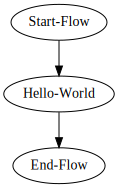

In [13]:
# display using graphviz
from ctm_python_client.utils.displayDAG import DisplayDAG

# sudo apt-get install graphviz (on unix)
#  or
# brew install graphviz (for mac)
DisplayDAG(t1_flow).display_graphviz()

## Step 6B - Display JSON

In [14]:
t1_flow.display_json()

TypeError: get_json() takes 1 positional argument but 2 were given

# Step 7 - Submit Workflow to Control-M

In [ ]:
t1_flow.deploy()

In [ ]:
t1_flow.run()